In [1]:
import pandas as pd
import re
import os
import pymysql
from sqlalchemy import create_engine
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

%matplotlib inline
pd.set_option('display.max_columns', 50)

In [2]:
# Set up SQL engine
cred = os.environ.get('SQL')
engine = create_engine('mysql+pymysql://'+cred+'@localhost/books_project')

In [3]:
amazon32 = pd.read_sql("amazon32", con=engine).drop("index", axis=1)
gr_books_10k = pd.read_sql("gr_books_10k", con=engine).drop("index", axis=1)

In [4]:
am32_gr10k = gr_books_10k.set_index("isbn").join(amazon32.set_index("ISBN_10"), how="inner")[["isbn13", "authors", "original_publication_year", "title", "average_rating", "ratings_count", "work_ratings_count", 
                                                                                              "work_text_reviews_count", "ratings_1", "ratings_2", "ratings_3", "ratings_4", "ratings_5", "Num Genre", "Genre"]]
am32_gr10k

,isbn13,authors,original_publication_year,title,average_rating,ratings_count,work_ratings_count,work_text_reviews_count,ratings_1,ratings_2,ratings_3,ratings_4,ratings_5,Num Genre,Genre
0007144350,9780007144360.0,"Oscar Wilde, Merlin Holland",1908.0,Complete Works of Oscar Wilde,4.45,10835,17952,320,114,242,1746,5241,10609,15,Literature & Fiction
0007162219,9780007162220.0,Simon Singh,2004.0,Big Bang: The Origin of the Universe,4.14,12488,13015,282,230,541,2237,4203,5804,23,Science & Math
0020306652,9780020306660.0,Jim Bouton,1970.0,Ball Four,3.99,12805,13853,573,445,692,2627,4926,5163,26,Sports & Outdoors
006000150X,9780060001510.0,"Doreen Cronin, Harry Bliss",1996.0,Diary of a Worm,4.19,23320,23423,691,322,987,4006,6599,11509,4,Children's Books
0060005696,9780060005700.0,Barry Schwartz,2004.0,The Paradox of Choice: Why More Is Less,3.84,20990,21859,1076,491,1349,5666,8113,6240,13,Humor & Entertainment
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1936365537,9781936365530.0,David Byrne,2012.0,How Music Works,3.95,10163,11016,738,380,518,2214,4018,3886,0,Arts & Photography
1937007588,9781937007580.0,Ilona Andrews,2013.0,"Magic Rises (Kate Daniels, #6)",4.49,29556,33573,2621,91,276,2687,10657,19862,24,Science Fiction & Fantasy
2844140580,9782844140590.0,Marjane Satrapi,2000.0,"Persepolis, Volume 1",4.27,46993,47133,301,1200,1409,5430,14422,24672,12,History
4770020678,9784770020670.0,"Tetsuko Kuroyanagi, Chihiro Iwasaki, Dorothy B...",1981.0,Totto-chan: The Little Girl at the Window,4.30,13859,16214,1638,200,407,1980,5376,8251,1,Biographies & Memoirs


In [15]:
am32_gr10k.describe()

,original_publication_year,average_rating,ratings_count,work_ratings_count,work_text_reviews_count,ratings_1,ratings_2,ratings_3,ratings_4,ratings_5,Num Genre
count,2151.000000,2154.000000,2.154000e+03,2.154000e+03,2154.000000,2154.000000,2154.000000,2154.000000,2154.000000,2.154000e+03,2154.000000
mean,1959.155277,4.054912,7.006228e+04,7.624971e+04,3520.786908,1926.957289,3954.198700,13990.401578,25042.761374,3.133539e+04,14.650882
std,260.933742,0.237318,1.920479e+05,2.019551e+05,6803.390268,11525.027285,14495.354692,37595.440327,61765.720205,8.721646e+04,8.272121
min,-762.000000,2.840000,3.799000e+03,6.823000e+03,31.000000,11.000000,53.000000,323.000000,1152.000000,7.880000e+02,0.000000
25%,1985.000000,3.900000,1.410300e+04,1.571500e+04,728.250000,211.000000,618.000000,2891.000000,5329.000000,6.186250e+03,5.000000
50%,2002.000000,4.070000,2.372950e+04,2.635000e+04,1517.500000,436.000000,1166.000000,5007.000000,9290.500000,1.038400e+04,15.000000
75%,2011.000000,4.220000,5.105850e+04,5.561875e+04,3338.750000,1100.000000,2641.250000,10449.500000,19192.750000,2.243600e+04,22.000000
max,2016.000000,4.760000,3.866839e+06,3.916824e+06,95009.000000,456191.000000,436802.000000,793319.000000,936012.000000,1.355439e+06,31.000000


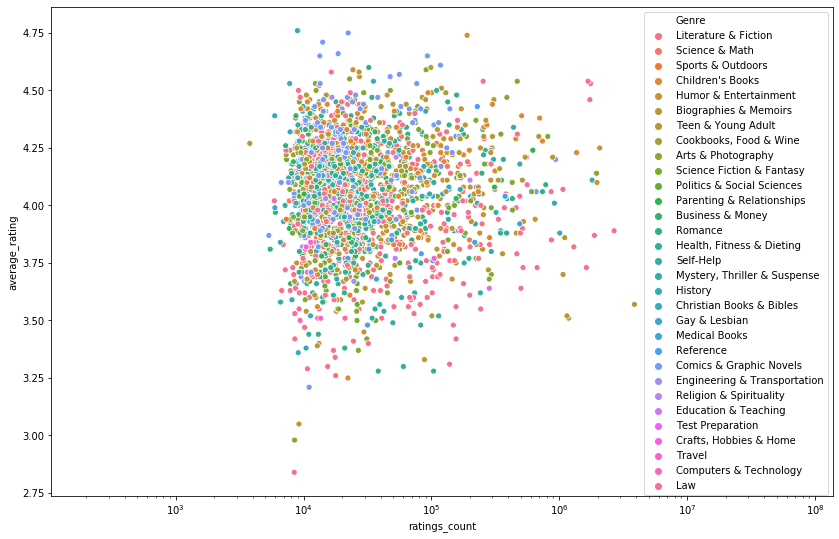

In [6]:
f, ax = plt.subplots(figsize=(14, 9))
ax.set(xscale="log")
sns.scatterplot("ratings_count", "average_rating", "Genre", data=am32_gr10k, ax=ax)

In [7]:
am32_gr10k.corr()

,original_publication_year,average_rating,ratings_count,work_ratings_count,work_text_reviews_count,ratings_1,ratings_2,ratings_3,ratings_4,ratings_5,Num Genre
original_publication_year,1.000000,0.065404,-0.015946,-0.016458,0.045656,-0.010727,-0.033504,-0.038060,-0.017027,-0.002654,-0.021078
average_rating,0.065404,1.000000,-0.011201,-0.010763,-0.043099,-0.113802,-0.151729,-0.118469,-0.022726,0.082494,-0.092584
ratings_count,-0.015946,-0.011201,1.000000,0.997968,0.777808,0.742020,0.876416,0.958196,0.979981,0.960092,0.042428
work_ratings_count,-0.016458,-0.010763,0.997968,1.000000,0.796933,0.730349,0.870340,0.957075,0.984303,0.964773,0.049104
work_text_reviews_count,0.045656,-0.043099,0.777808,0.796933,1.000000,0.573432,0.701528,0.767899,0.807929,0.749802,0.130890
ratings_1,-0.010727,-0.113802,0.742020,0.730349,0.573432,1.000000,0.934065,0.791657,0.641467,0.608253,0.045110
ratings_2,-0.033504,-0.151729,0.876416,0.870340,0.701528,0.934065,1.000000,0.946085,0.823081,0.734981,0.055575
ratings_3,-0.038060,-0.118469,0.958196,0.957075,0.767899,0.791657,0.946085,1.000000,0.951331,0.849534,0.052785
ratings_4,-0.017027,-0.022726,0.979981,0.984303,0.807929,0.641467,0.823081,0.951331,1.000000,0.939384,0.053737
ratings_5,-0.002654,0.082494,0.960092,0.964773,0.749802,0.608253,0.734981,0.849534,0.939384,1.000000,0.037695


In [23]:
GenRat = am32_gr10k.pivot_table(index="Genre", values="average_rating", aggfunc=["mean","count"]).sort_values(("mean", "average_rating"))
GenRat = GenRat[GenRat[("count", "average_rating")]>=10]
GenRat
# am32_gr10k.plot.bar(x="Genre", y="average_rating", figsize=(14,9))

,mean,count
,average_rating,average_rating
Genre,,
Travel,3.853636,11
"Mystery, Thriller & Suspense",3.966728,162
Literature & Fiction,3.976082,416
Arts & Photography,3.982963,27
Parenting & Relationships,4.002105,19
Humor & Entertainment,4.005500,80
"Health, Fitness & Dieting",4.007000,30
Medical Books,4.008261,23


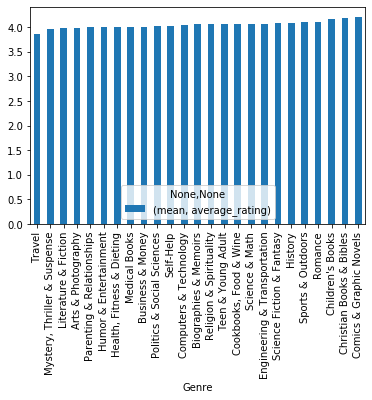

In [26]:
GenRat.plot.bar(y=("mean","average_rating"))

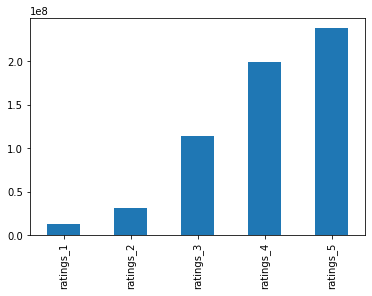

In [31]:
gr_books_10k[["ratings_1", "ratings_2", "ratings_3", "ratings_4", "ratings_5"]].sum().plot.bar()